In [27]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.font_manager as fm
import math
import seaborn as sns
import os
from collections import Counter
import sklearn
from sklearn.decomposition import PCA
from sklearn import metrics, preprocessing, neighbors, cluster
from sklearn import cluster
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')
# Create color maps
from matplotlib.colors import ListedColormap
cmap = ListedColormap(["#e41a1c","#984ea3","#a65628","#377eb8","#ffff33","#4daf4a","#ff7f00"])
%matplotlib inline
pd.set_option('display.max_columns', None)
from deep_translator import GoogleTranslator
import geopandas as gpd
import matplotlib.pyplot as plt
from googletrans import Translator
import folium
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [28]:
df = pd.read_csv('TotalData1.csv', encoding='utf-8')
# df

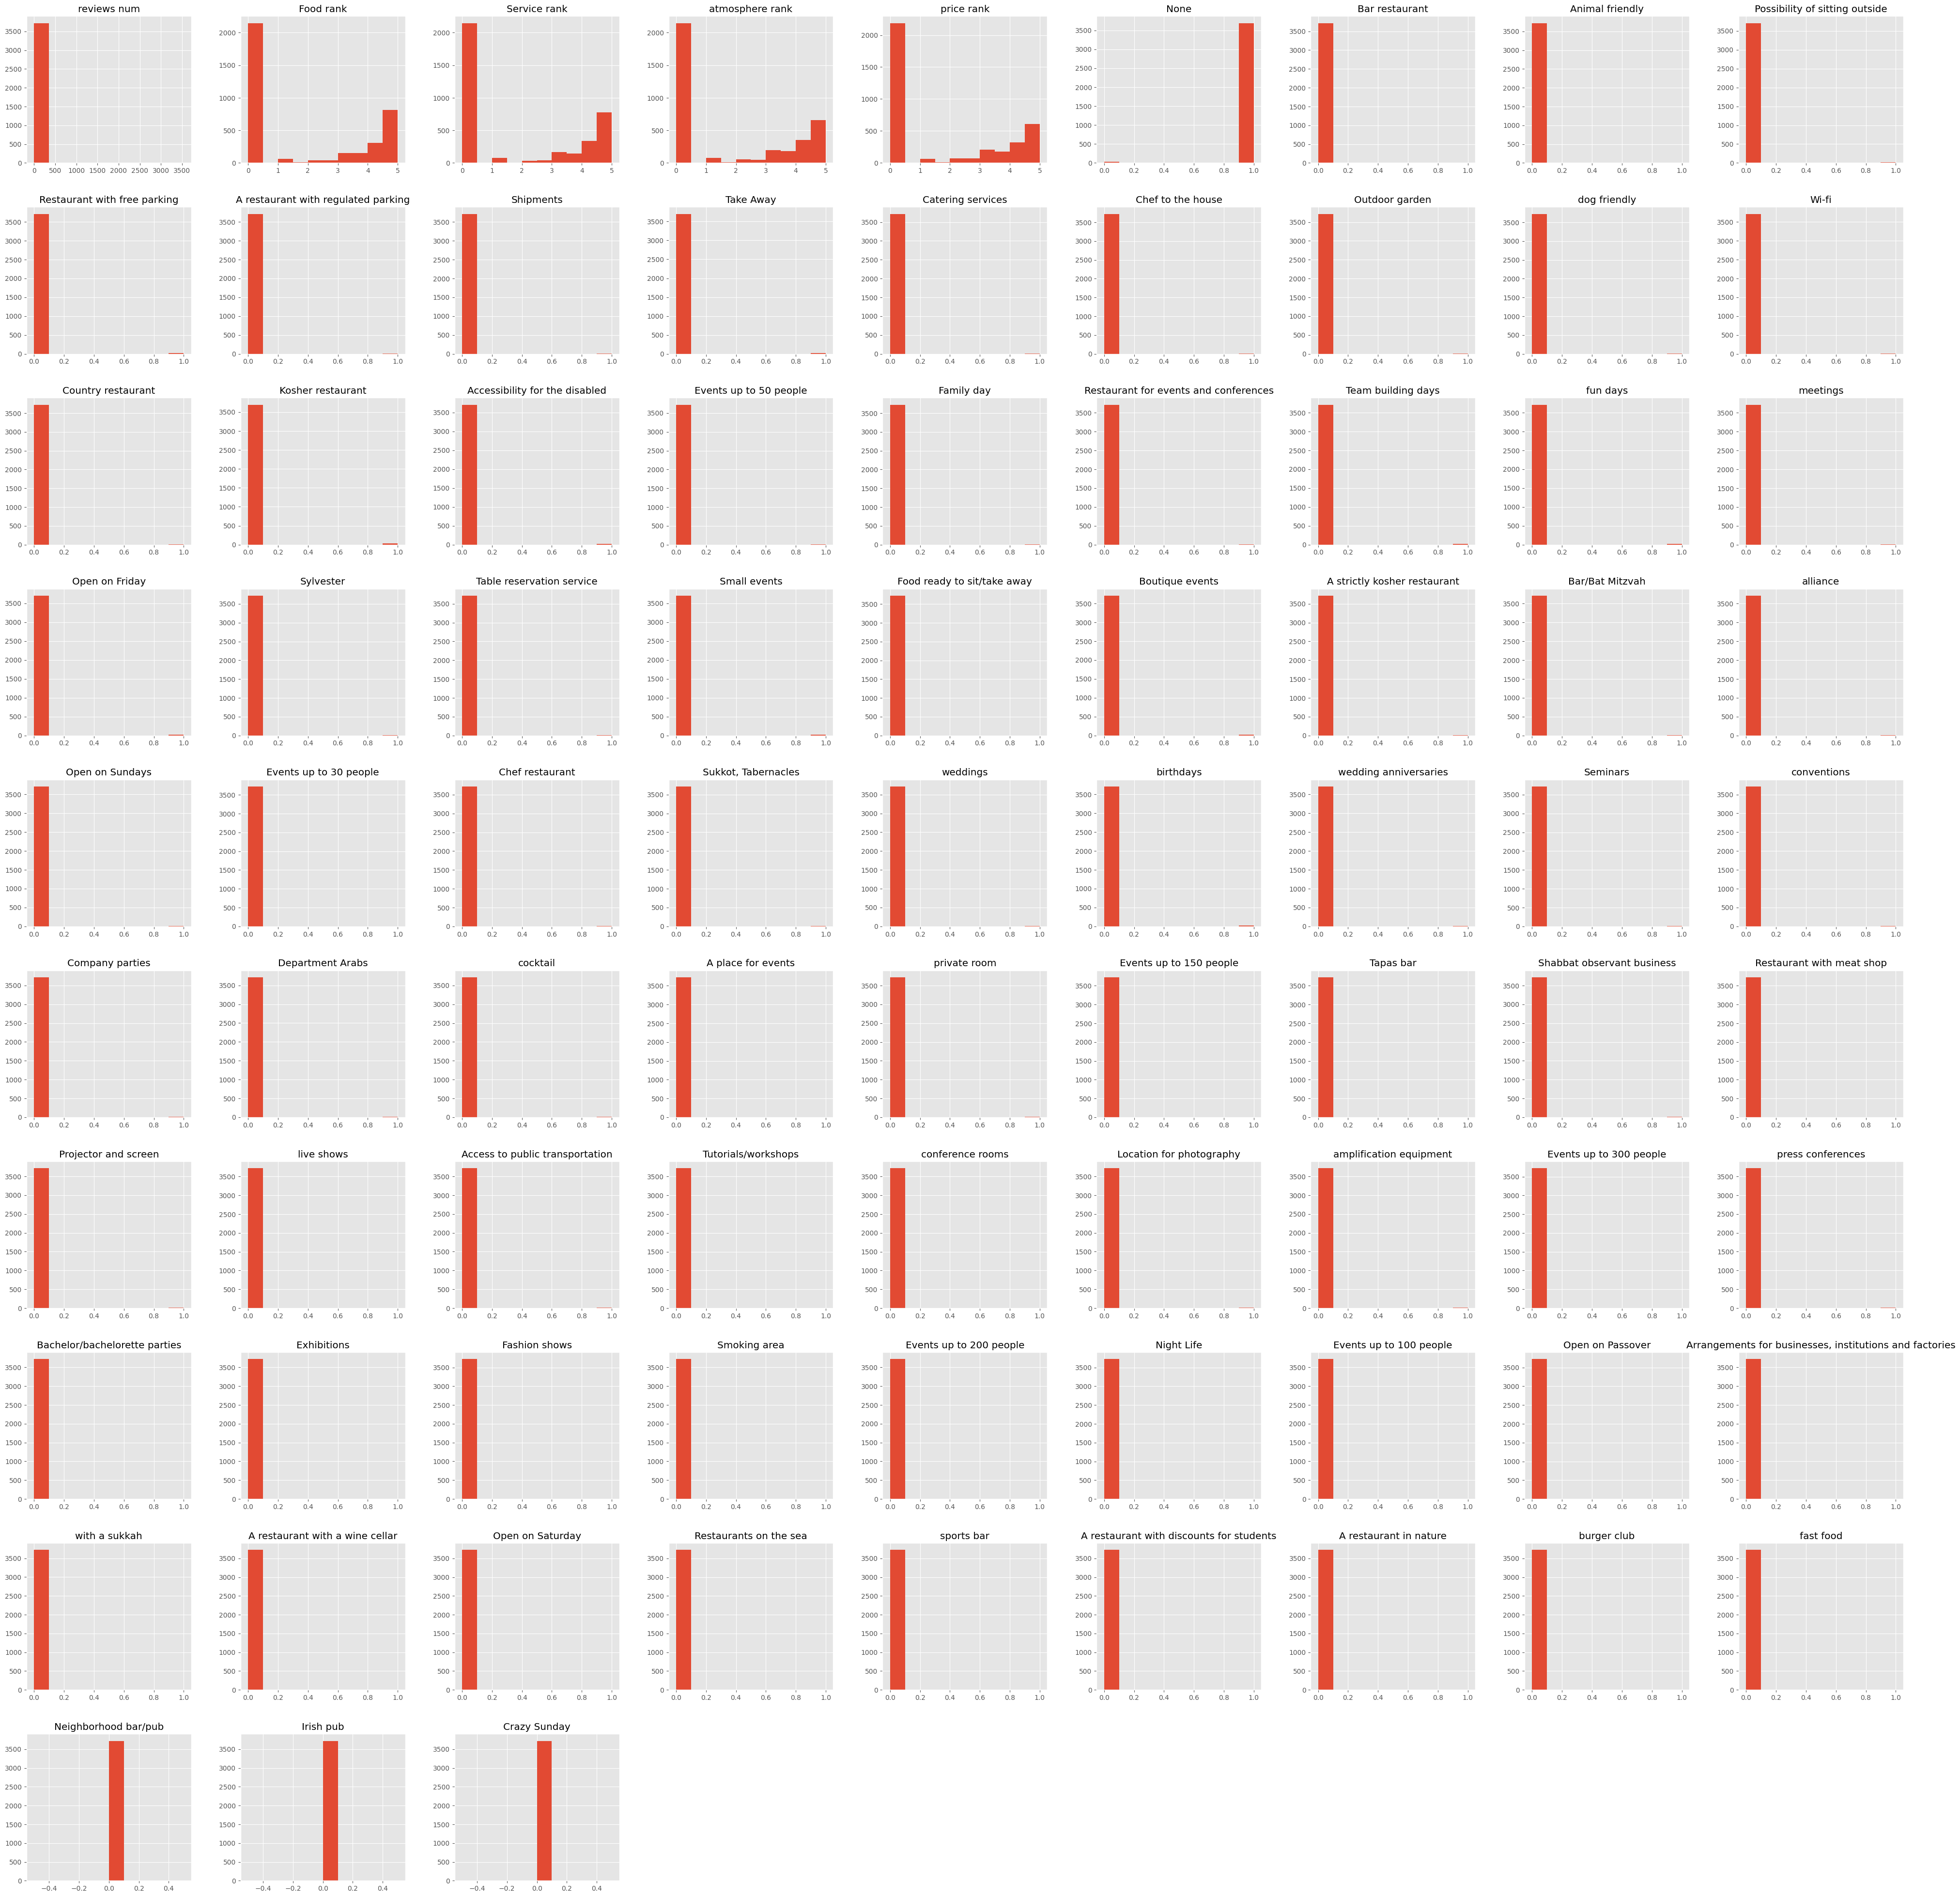

In [29]:
df2 = df.drop("rest rank", axis=1)
rank_counts = df['rest rank'].value_counts()
df2.hist(figsize=(50, 50))  # Set the figure size
plt.bar(rank_counts.index, rank_counts.values)  # Create the bar chart
plt.xlabel('Restaurant Rank')  # Set the x-axis label
plt.ylabel('Number of Restaurants')  # Set the y-axis label
plt.title('Distribution of Restaurant Ranks')  # Set the title
plt.show()  # Display the plot

<Axes: ylabel='count'>

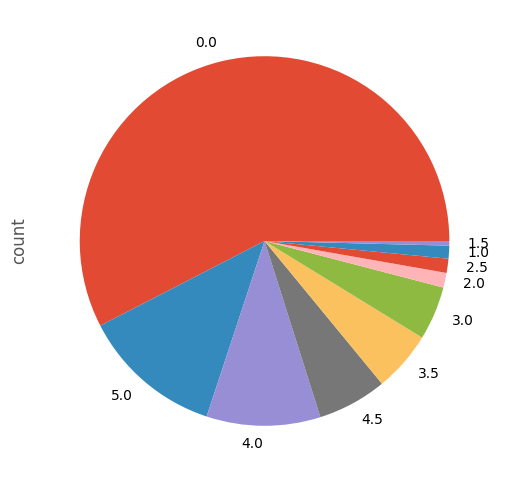

In [30]:
df['rest rank'].value_counts().plot(kind='pie')

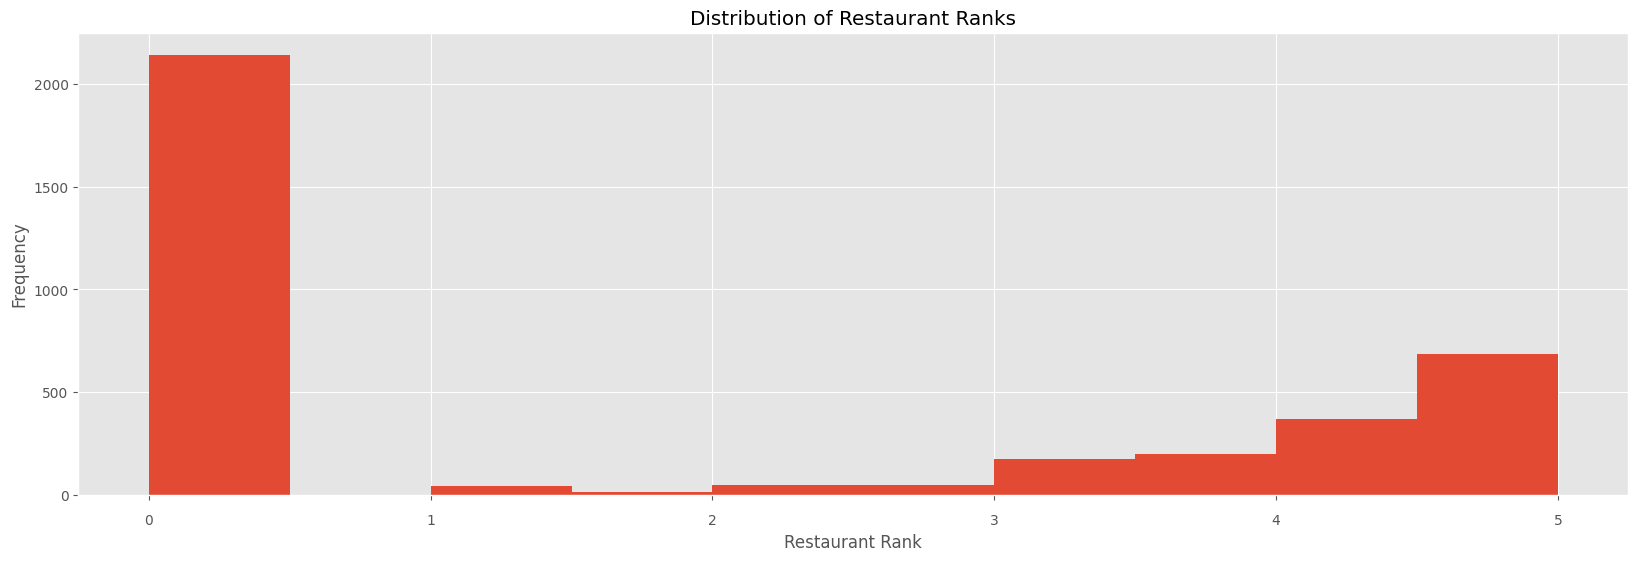

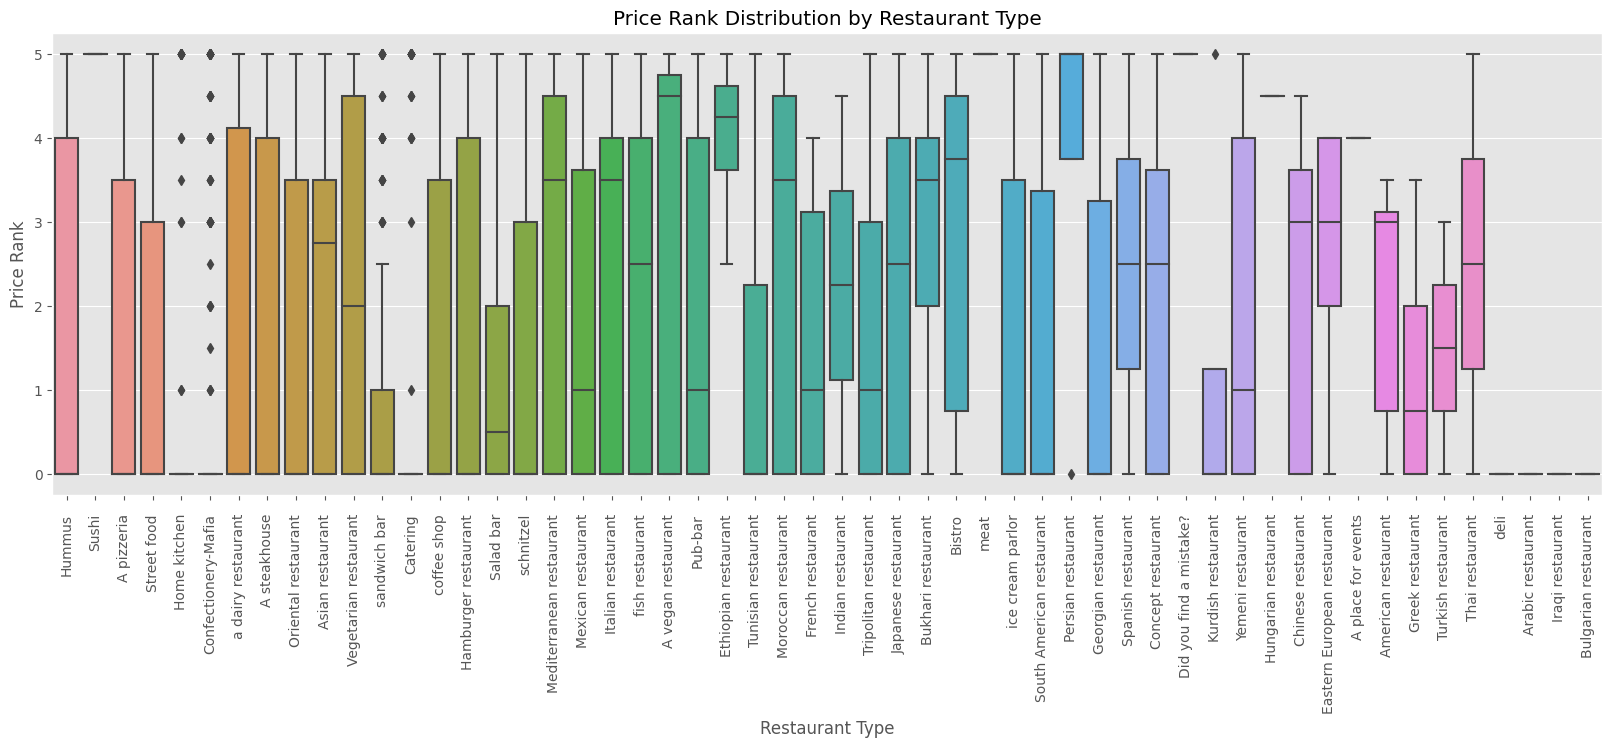

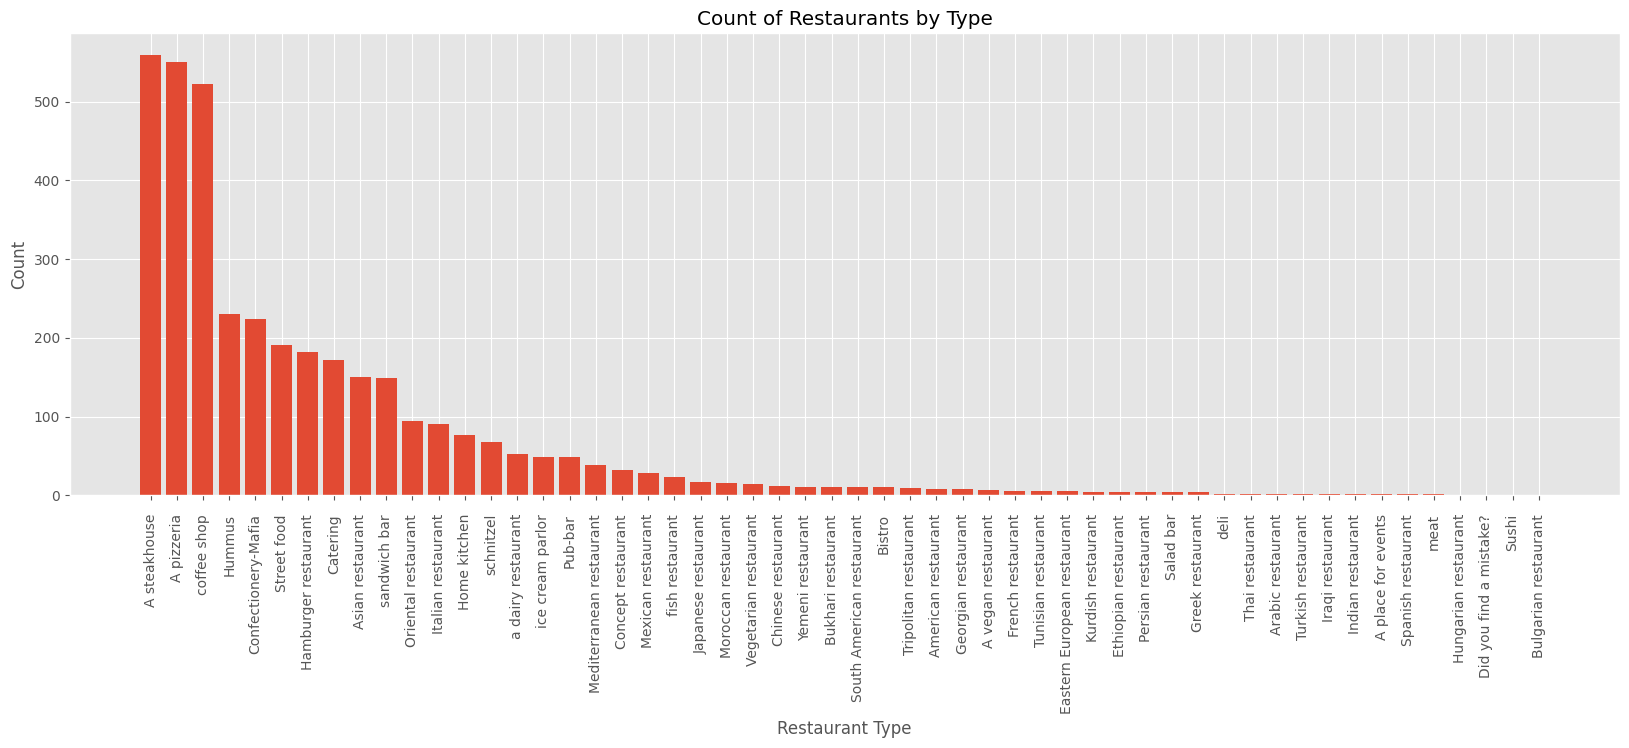

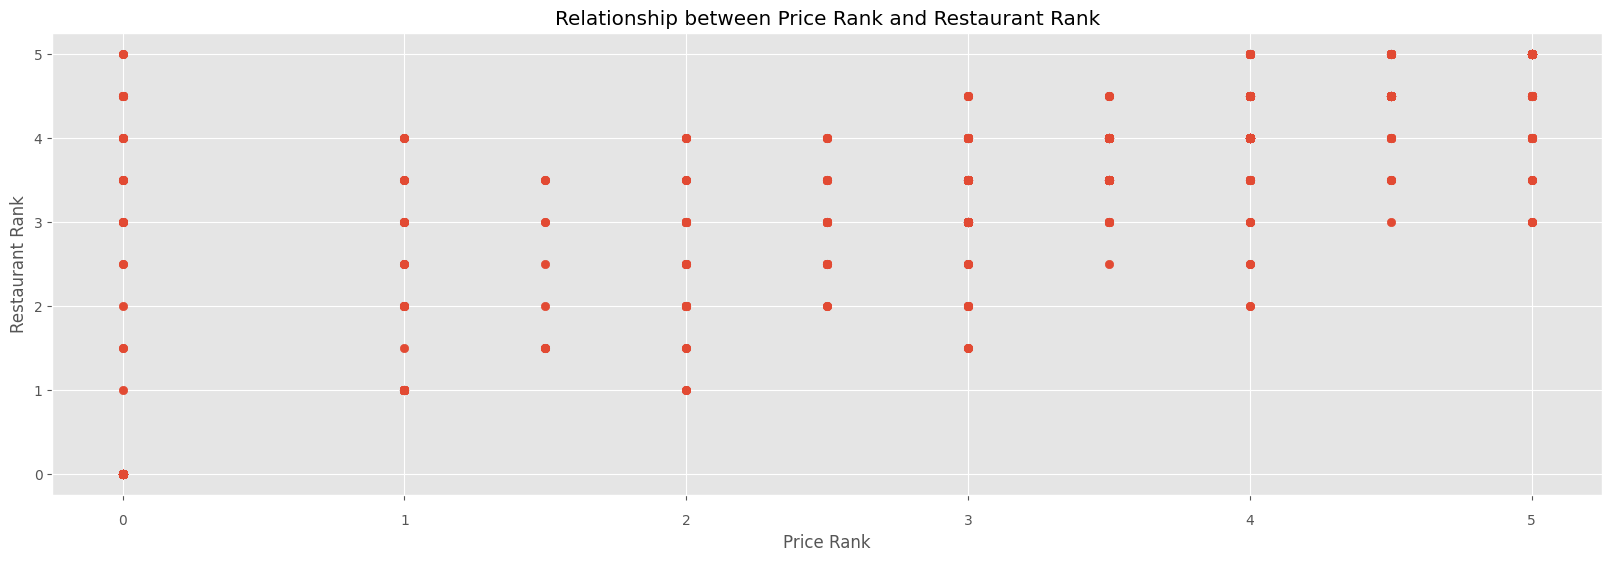

<Axes: >

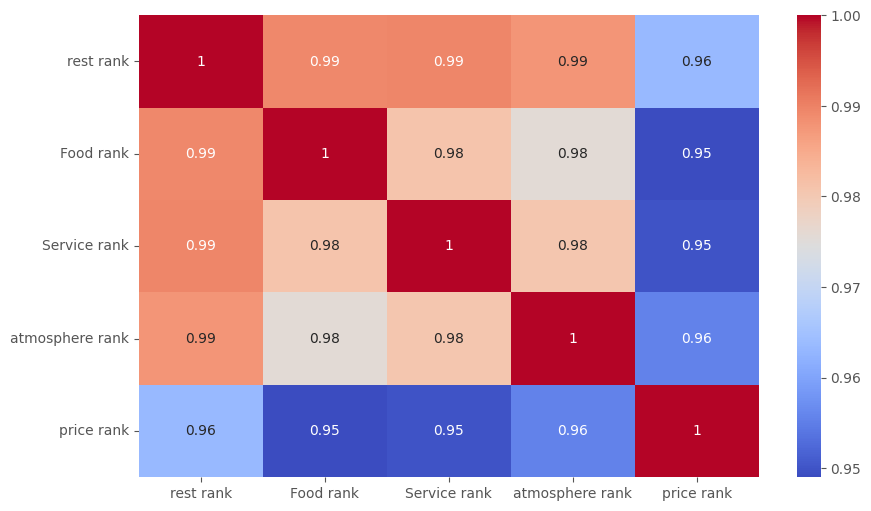

In [31]:


# Load the restaurant dataset into a Pandas DataFrame
df = pd.read_csv('TotalData1.csv')

# Basic Statistics
mean_rest_rank = df['rest rank'].mean()
median_reviews_num = df['reviews num'].median()
mode_rest_type = df['rest type'].mode()[0]
fig,ax=plt.subplots(figsize=(20,6))
plt.tick_params(axis='x',rotation=0,pad=10)
# Distribution Analysis
plt.hist(df['rest rank'], bins=10)
plt.xlabel('Restaurant Rank')
plt.ylabel('Frequency')
plt.title('Distribution of Restaurant Ranks')
plt.show()
fig,ax=plt.subplots(figsize=(20,6))
plt.tick_params(axis='x',rotation=90,pad=10)
sns.boxplot(x='rest type', y='price rank', data=df)
plt.xlabel('Restaurant Type')
plt.ylabel('Price Rank')
plt.title('Price Rank Distribution by Restaurant Type')
plt.xticks(rotation=90)
plt.show()
fig,ax=plt.subplots(figsize=(20,6))
plt.tick_params(axis='x',rotation=90,pad=10)
plt.bar(df['rest type'].value_counts().index, df['rest type'].value_counts().values)
plt.xlabel('Restaurant Type')
plt.ylabel('Count')
plt.title('Count of Restaurants by Type')
plt.xticks(rotation=90)
plt.show()
fig,ax=plt.subplots(figsize=(20,6))
plt.tick_params(axis='x',rotation=0,pad=10)
# Relationships and Correlations
plt.scatter(df['price rank'], df['rest rank'])
plt.xlabel('Price Rank')
plt.ylabel('Restaurant Rank')
plt.title('Relationship between Price Rank and Restaurant Rank')
plt.show()

corr_matrix = df[['rest rank', 'Food rank', 'Service rank', 'atmosphere rank', 'price rank']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')




In [32]:
# map_data = gpd.read_file('israel_map_new')
# print(map_data.head())
# Load shapefile 1
shapefile1 = gpd.read_file('israel_map\gadm41_ISR_1.shp')

# Load shapefile 2
shapefile2 = gpd.read_file('israel_map\gadm41_PSE_2.shp')


In [33]:
# map_data.plot()
print(shapefile1.head())
print(shapefile2.head())
merged_shapefile = gpd.GeoDataFrame(pd.concat([shapefile1, shapefile2], ignore_index=True))
# merged_shapefile = shapefile1.merge(shapefile2, on='common_attribute_column')
merged_shapefile.to_file('israel_map\merged_shapefile.shp')



     GID_1 GID_0 COUNTRY    NAME_1          VARNAME_1 NL_NAME_1 TYPE_1   
0  ISR.1_1   ISR  Israel     Golan                 NA        NA  Mehoz  \
1  ISR.2_1   ISR  Israel   HaDarom  Southern District        NA  Mehoz   
2  ISR.3_1   ISR  Israel     Haifa               Hefa        NA  Mehoz   
3  ISR.4_1   ISR  Israel  HaMerkaz   Central District        NA  Mehoz   
4  ISR.5_1   ISR  Israel   HaZafon           Northern        NA  Mehoz   

  ENGTYPE_1 CC_1 HASC_1 ISO_1   
0  District   NA     NA    NA  \
1  District   NA  IL.HD  IL-D   
2  District   NA  IL.HA    NA   
3  District   NA  IL.HM  IL-M   
4  District   NA  IL.HZ    NA   

                                            geometry  
0  MULTIPOLYGON (((35.64913 32.69056, 35.64905 32...  
1  POLYGON ((34.91069 29.49708, 34.90894 29.49887...  
2  POLYGON ((34.86597 32.40984, 34.86570 32.40986...  
3  POLYGON ((34.82510 31.79277, 34.82278 31.79277...  
4  POLYGON ((35.63564 33.24520, 35.63606 33.24487...  
       GID_2 GID_0    COUN

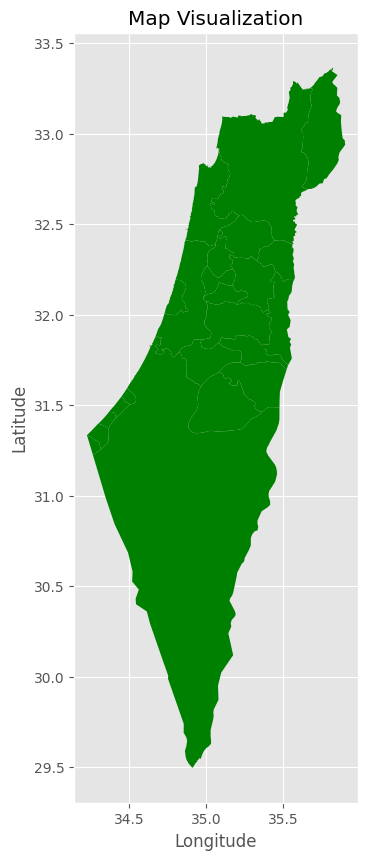

In [34]:

map_data = gpd.read_file('israel_map\merged_shapefile.shp')
# Customize the plot
fig, ax = plt.subplots(figsize=(10, 10))
map_data.plot(ax=ax, color='green')
ax.set_title('Map Visualization')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()


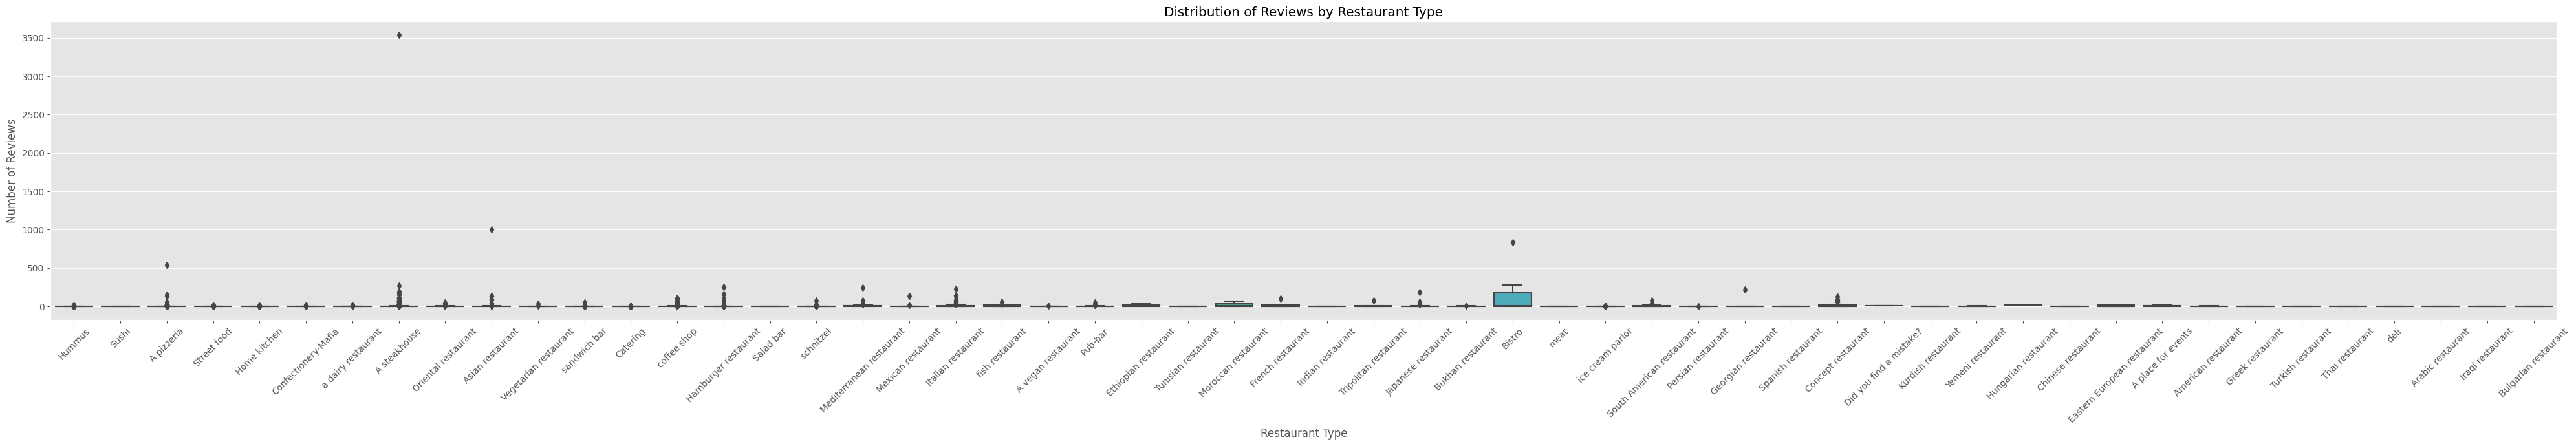

In [35]:
data = pd.read_csv('TotalData1.csv')
plt.figure(figsize=(50, 6))
sns.boxplot(x='rest type', y='reviews num', data=data)
plt.title('Distribution of Reviews by Restaurant Type')
plt.xlabel('Restaurant Type')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.show()


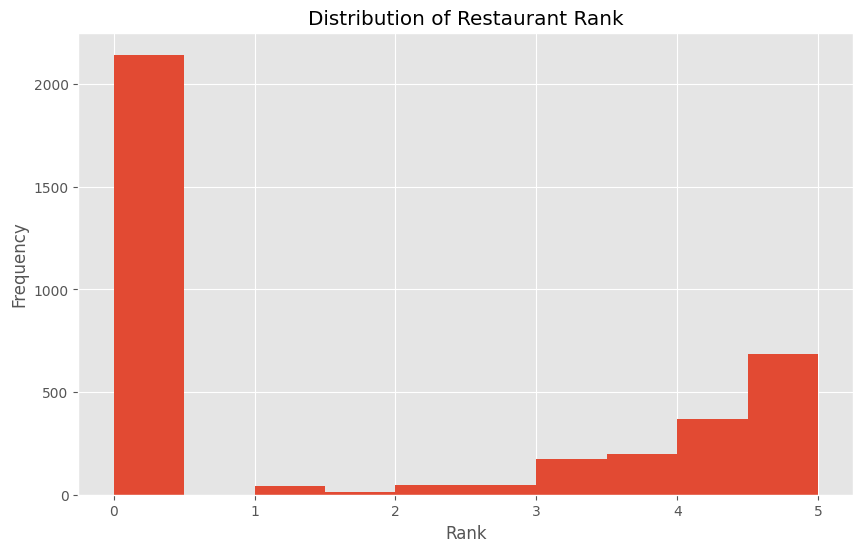

In [36]:
plt.figure(figsize=(10, 6))
plt.hist(data['rest rank'], bins=10)
plt.title('Distribution of Restaurant Rank')
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.show()


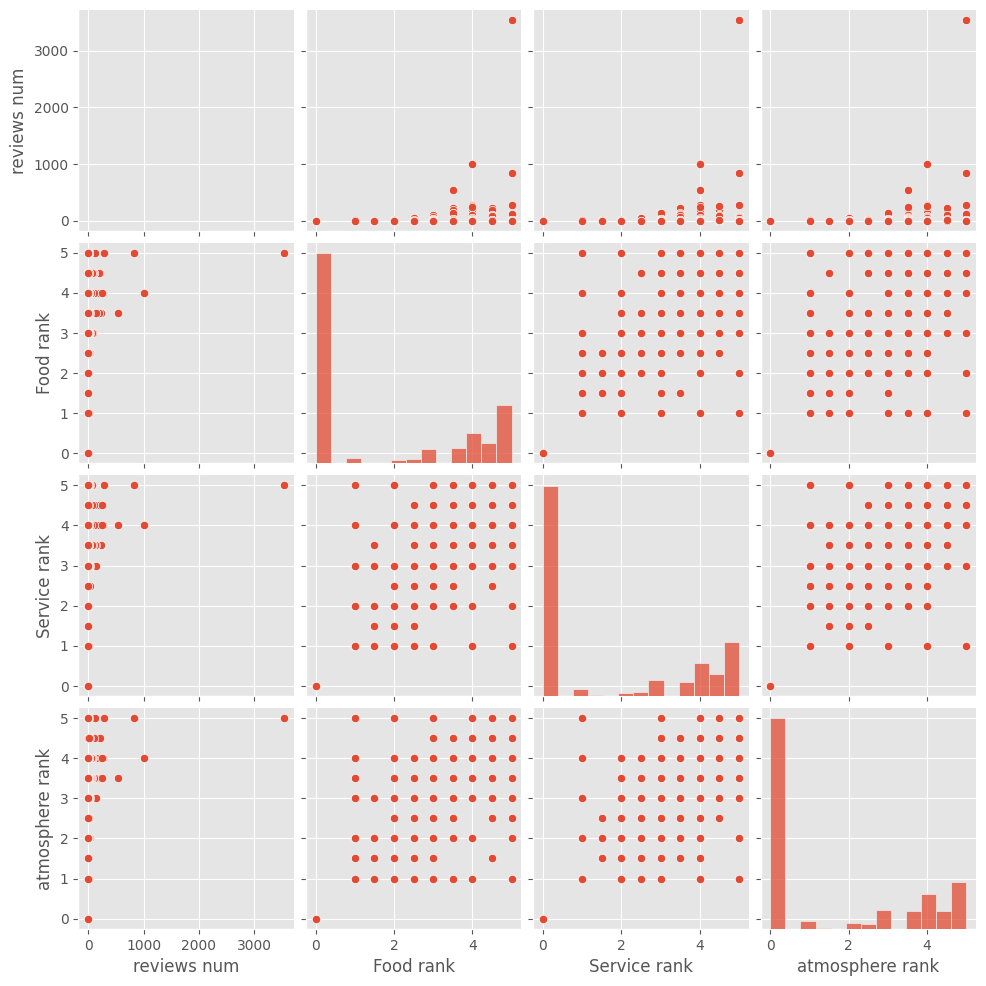

In [37]:
numeric_features = ['reviews num', 'Food rank', 'Service rank', 'atmosphere rank']
sns.pairplot(data[numeric_features])
plt.show()


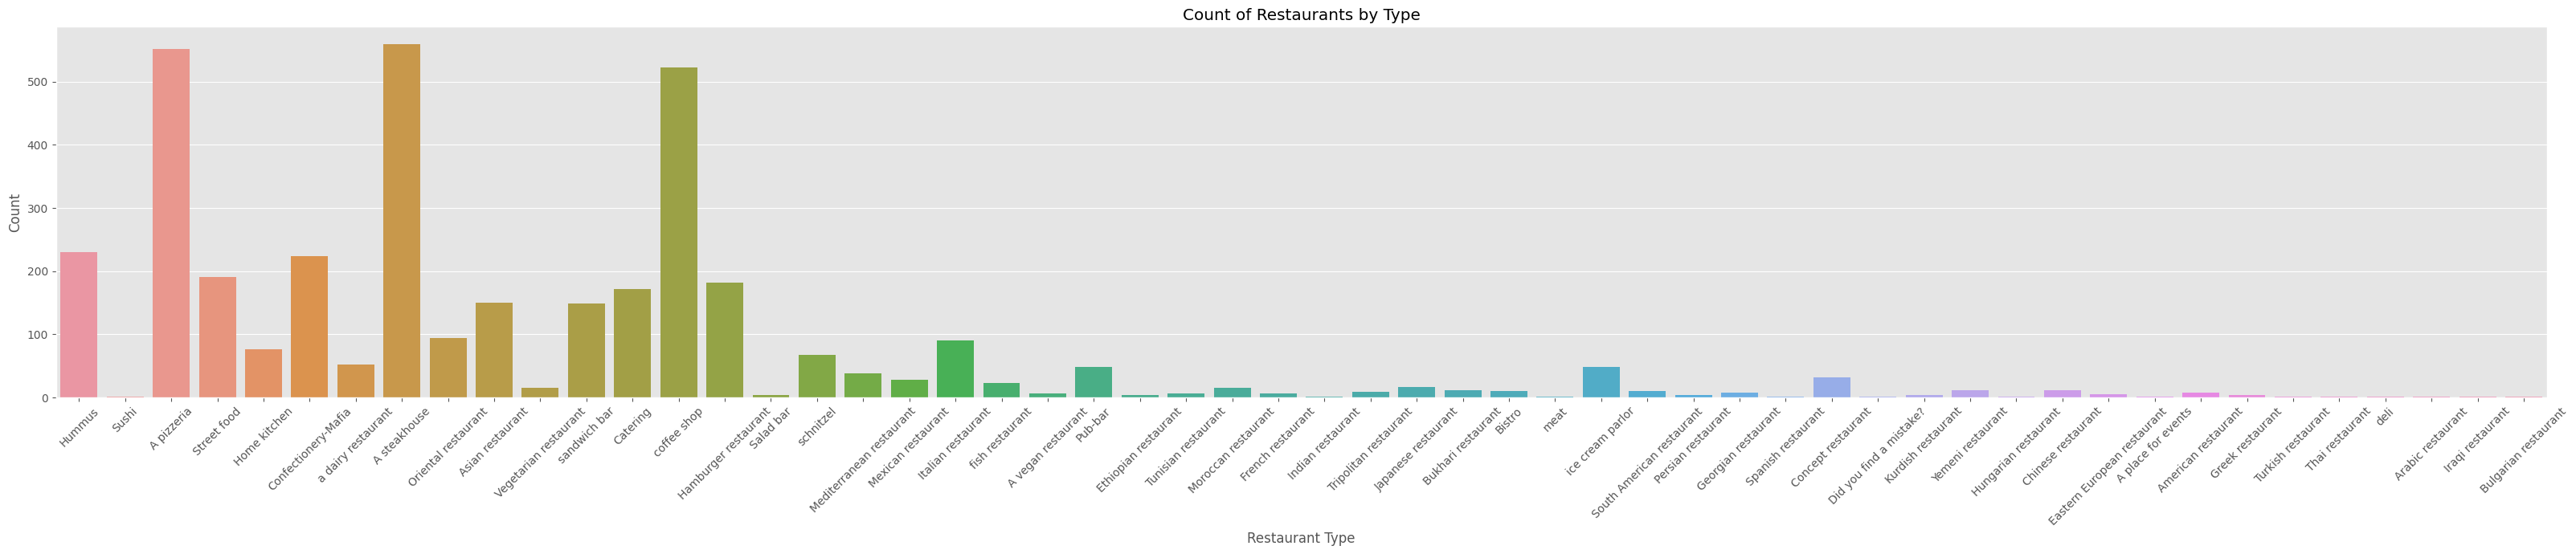

In [38]:
plt.figure(figsize=(40, 6))
sns.countplot(x='rest type', data=data)
plt.title('Count of Restaurants by Type')
plt.xlabel('Restaurant Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


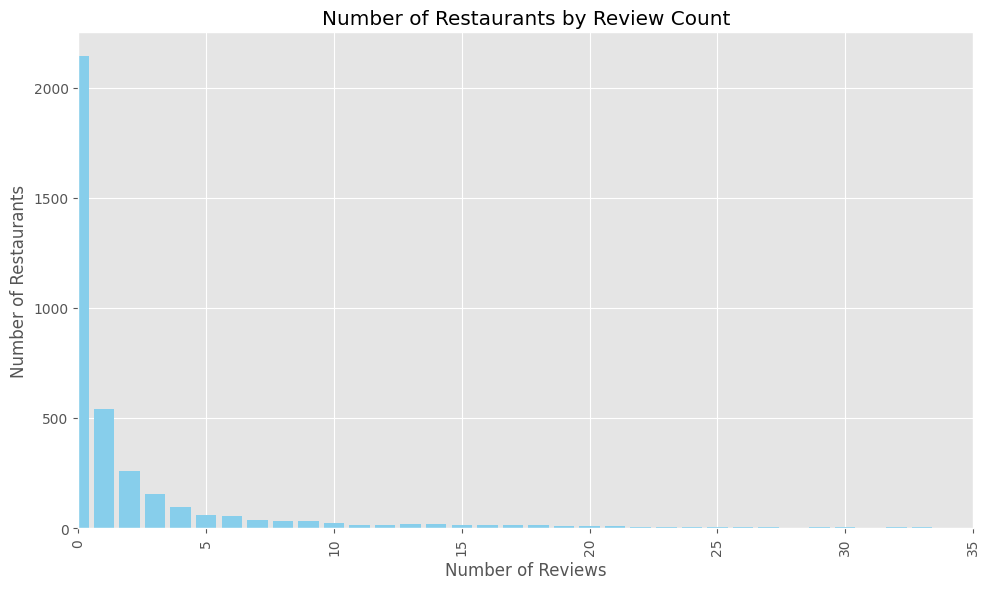

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

# Load the restaurant data from a CSV file
restaurant_data = pd.read_csv('TotalData1.csv')

# Extract the number of reviews and count the number of restaurants for each review count
review_counts = restaurant_data['reviews num'].value_counts().sort_index()

# Plot the number of restaurants by review count using a bar chart
plt.figure(figsize=(10, 6))
plt.bar(review_counts.index, review_counts.values, color='skyblue')
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Restaurants')
plt.title('Number of Restaurants by Review Count')
plt.xticks(rotation=90)

# Limit the x-axis to present the data nicer
plt.xlim(0, 35)                                          
plt.gca().xaxis.set_major_locator(MultipleLocator(5))


plt.tight_layout()
plt.show()
